In [59]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

api_key = '8f9f028e6c06e4e7a988060db352ea1998cf1ed4'

fullurl = 'https://api.census.gov/data/2018/abstcb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F&for=us:*&key='
#data = requests.get(fullurl+api_key)
#print(data)
# print(type(data))

tech_df = pd.DataFrame(data.json())


In [60]:
# promote headers
header_row = 0
tech_df.columns = tech_df.iloc[header_row]
tech_df.drop(labels=0,axis=0,inplace=True)
print(tech_df)


0        GEO_ID           NAME NAICS2017            NAICS2017_LABEL  SEX  \
1     0100000US  United States        00      Total for all sectors  001   
2     0100000US  United States        00      Total for all sectors  001   
3     0100000US  United States        00      Total for all sectors  001   
4     0100000US  United States        00      Total for all sectors  001   
5     0100000US  United States        00      Total for all sectors  001   
...         ...            ...       ...                        ...  ...   
5496  0100000US  United States        99  Industries not classified  001   
5497  0100000US  United States        99  Industries not classified  001   
5498  0100000US  United States        99  Industries not classified  001   
5499  0100000US  United States        99  Industries not classified  001   
5500  0100000US  United States        99  Industries not classified  001   

0    SEX_LABEL ETH_GROUP ETH_GROUP_LABEL RACE_GROUP RACE_GROUP_LABEL  ...  \
1        T

In [65]:
# do some cleaning
# tech_df.drop('GEO_ID',inplace=True,axis=1)
# tech_df.drop('NAME',inplace=True,axis=1)
tech_df.drop('YEAR',inplace=True,axis=1)


In [67]:
print(tech_df.columns)


Index(['NAICS2017', 'NAICS2017_LABEL', 'SEX', 'SEX_LABEL', 'ETH_GROUP',
       'ETH_GROUP_LABEL', 'RACE_GROUP', 'RACE_GROUP_LABEL', 'VET_GROUP',
       'VET_GROUP_LABEL', 'NSFSZFI', 'NSFSZFI_LABEL', 'FACTORS_P',
       'FACTORS_P_LABEL', 'FIRMPDEMP', 'FIRMPDEMP_F', 'FIRMPDEMP_PCT',
       'FIRMPDEMP_PCT_F', 'RCPPDEMP', 'RCPPDEMP_F', 'RCPPDEMP_PCT',
       'RCPPDEMP_PCT_F', 'EMP', 'EMP_F', 'EMP_PCT', 'EMP_PCT_F', 'PAYANN',
       'PAYANN_F', 'PAYANN_PCT', 'PAYANN_PCT_F', 'FIRMPDEMP_S',
       'FIRMPDEMP_S_F', 'FIRMPDEMP_PCT_S', 'FIRMPDEMP_PCT_S_F', 'RCPPDEMP_S',
       'RCPPDEMP_S_F', 'RCPPDEMP_PCT_S', 'RCPPDEMP_PCT_S_F', 'EMP_S',
       'EMP_S_F', 'EMP_PCT_S', 'EMP_PCT_S_F', 'PAYANN_S', 'PAYANN_S_F',
       'PAYANN_PCT_S', 'PAYANN_PCT_S_F', 'us'],
      dtype='object', name=0)


0        FACTORS_P_LABEL FIRMPDEMP_PCT
38         Too expensive           5.5
39       Tech Not Mature           1.1
40         Improper Data           0.5
41       Unreliable Data           0.3
42   Insufficient Talent           0.7
43  Laws and Regulations           0.4
44     Security Concerns           0.6
45  Insufficient Capital           0.9
0        FACTORS_P_LABEL FIRMPDEMP_PCT
38         Too expensive           5.5
39       Tech Not Mature           1.1
40         Improper Data           0.5
41       Unreliable Data           0.3
42   Insufficient Talent           0.7
43  Laws and Regulations           0.4
44     Security Concerns           0.6
45  Insufficient Capital           0.9
<class 'numpy.float64'>


C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


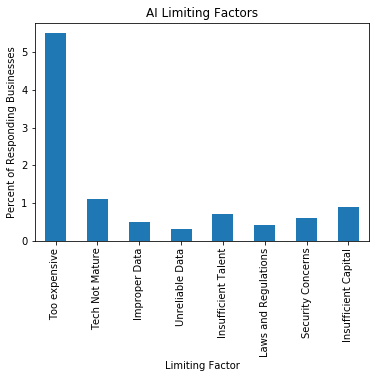

In [135]:
allfirms_AI = tech_df[(tech_df['NAICS2017_LABEL'] == 'Total for all sectors') & (tech_df['SEX_LABEL'] == 'Total') & (tech_df['ETH_GROUP_LABEL'] == 'Total') & (tech_df['RACE_GROUP_LABEL'] == 'Total') & (tech_df['VET_GROUP_LABEL'] == 'Total') & (tech_df['NSFSZFI_LABEL'] == 'All firms')]
allfirms_AI = allfirms_AI.loc[allfirms_AI['FACTORS_P'].str[0:2] == 'T1']
allfirms_AI = allfirms_AI.loc[allfirms_AI['FACTORS_P'].str[2:] != 'E36R10']
allfirms_AI = allfirms_AI.loc[allfirms_AI['FACTORS_P'].str[2:] != 'E36R99']
allfirms_AI = allfirms_AI.loc[allfirms_AI['FACTORS_P'].str[2:] != 'E36R09']

graph_colsAIQ = allfirms_AI[['FACTORS_P_LABEL','FIRMPDEMP_PCT']]



# rename entries
graph_colsAIQ.at[38,'FACTORS_P_LABEL'] = 'Too expensive'
graph_colsAIQ.at[39,'FACTORS_P_LABEL'] = 'Tech Not Mature'
graph_colsAIQ.at[40,'FACTORS_P_LABEL'] = 'Improper Data'
graph_colsAIQ.at[41,'FACTORS_P_LABEL'] = 'Unreliable Data'
graph_colsAIQ.at[42,'FACTORS_P_LABEL'] = 'Insufficient Talent'
graph_colsAIQ.at[43,'FACTORS_P_LABEL'] = 'Laws and Regulations'
graph_colsAIQ.at[44,'FACTORS_P_LABEL'] = 'Security Concerns'
graph_colsAIQ.at[45,'FACTORS_P_LABEL'] = 'Insufficient Capital'
print(graph_colsAIQ)


print(graph_colsAIQ)
graph_colsAIQ.FIRMPDEMP_PCT = graph_colsAIQ.FIRMPDEMP_PCT.astype(float)
print(type(graph_colsAIQ.FIRMPDEMP_PCT.iloc[1]))

ax = graph_colsAIQ.plot(title='AI Limiting Factors',kind='bar',x='FACTORS_P_LABEL',y='FIRMPDEMP_PCT')
ax.set_xlabel('Limiting Factor')
ax.set_ylabel('Percent of Responding Businesses')
ax.get_legend().remove()
plt.show()

5500
20
4413    T1E36R99
4452    T1E36R99
4523    T1E36R99
4578    T1E36R99
4658    T1E36R99
4713    T1E36R99
4756    T1E36R99
4786    T1E36R99
4841    T1E36R99
4892    T1E36R99
4947    T1E36R99
5073    T1E36R99
5102    T1E36R99
5136    T1E36R99
5174    T1E36R99
5236    T1E36R99
5259    T1E36R99
5346    T1E36R99
5383    T1E36R99
5456    T1E36R99
Name: FACTORS_P, dtype: object
0                                       NAICS2017_LABEL     PAYANN
4413      Mining, quarrying, and oil and gas extraction   45645859
4452         Agriculture, forestry, fishing and hunting    8591483
4523                                       Construction  360385210
4578                                          Utilities   52385870
4658                                      Manufacturing  604085252
4713                                       Retail trade  390784629
4756                                    Wholesale trade  364561236
4786                     Transportation and warehousing  236451084
4841              

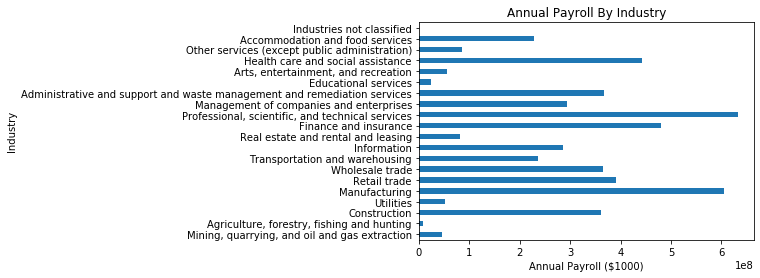

In [120]:

print(len(tech_df))

allsectors_PAYANN = tech_df[(tech_df['NAICS2017_LABEL'] != 'Total for all sectors') & (tech_df['FACTORS_P'] == 'T1E36R99')]
print(len(allsectors_PAYANN))
print(allsectors_PAYANN.FACTORS_P)
allsectors_PAYANN = allsectors_PAYANN[['NAICS2017_LABEL','PAYANN']]
print(allsectors_PAYANN)
allsectors_PAYANN.PAYANN = allsectors_PAYANN.PAYANN.astype(int)
ax = allsectors_PAYANN.plot(title='Annual Payroll By Industry',kind='barh',x='NAICS2017_LABEL',y='PAYANN')
ax.set_ylabel('Industry')
ax.set_xlabel('Annual Payroll ($1000)')
ax.get_legend().remove()
plt.show()

In [46]:
# read into excel for analysis
tech_df.to_excel('TechImpactCensusData.xlsx')